<a href="https://colab.research.google.com/github/WilliamLele/WilliamLele/blob/main/DimensionalityReductionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

This jupyter notebook is about PCA and KNN. The first part of the PCA section is more of an introductory tutorial. The second part of the PCA section and the KNN section is where you should write your code, which is indicated with a ToDo tag.


**Submission:** The jupyter notebook that you submit must contain the cell output (including plots!) from a clean execution (restart kernel and run all cells sequentially).

# Principal Component Analysis (PCA) - 15 points
In this part, you will use PCA as a feature extraction algorithm to reduce  the dimensionality of an image dataset. 



## Dataset

We use *Labeled Faces in the Wild* dataset, consisting of gray-scale headshots of celebrities and politicians.
We only consider persons from the dataset with at least 100 images. 

In [40]:
# Import required packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn import datasets
import numpy as np


# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

###
print ('Number of samples:', X.shape[0])
print('Number of features:', X.shape[1])
print('Classes:', np.unique(y))
print ("\nPeople:", target_names)

Number of samples: 1140
Number of features: 2914
Classes: [0 1 2 3 4]

People: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


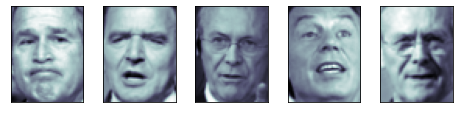

In [41]:
def plotFace(inputX, n_faces):
  fig = plt.figure(figsize=(8, 6))
  for i in range(n_faces):
      ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
      ax.imshow(np.reshape(inputX[i,:], [h,w]), cmap=plt.cm.bone)      

plotFace(X, 5)

Let's divide the data into a training set and a test set with a $7:3$ ratio. Be careful to only fit your models on the training set throughout this problem.

In [42]:
# split into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print( 'Number of training samples:', X_train.shape[0])
print( 'Number of testing samples:', X_test.shape[0])

Number of training samples: 798
Number of testing samples: 342


## Scikit-Learn PCA

### Fit a PCA model

Here, we use the PCA model from scikit-learn with 100 components.


shape of principal components: (100, 2914)


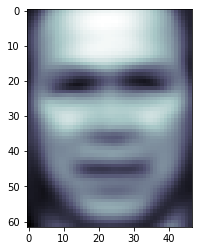

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
print("shape of principal components:", pca.components_.shape)
plt.imshow(pca.mean_.reshape([h,w]), cmap=plt.cm.bone);

Let's plot the top 10 most significant eigenfaces:

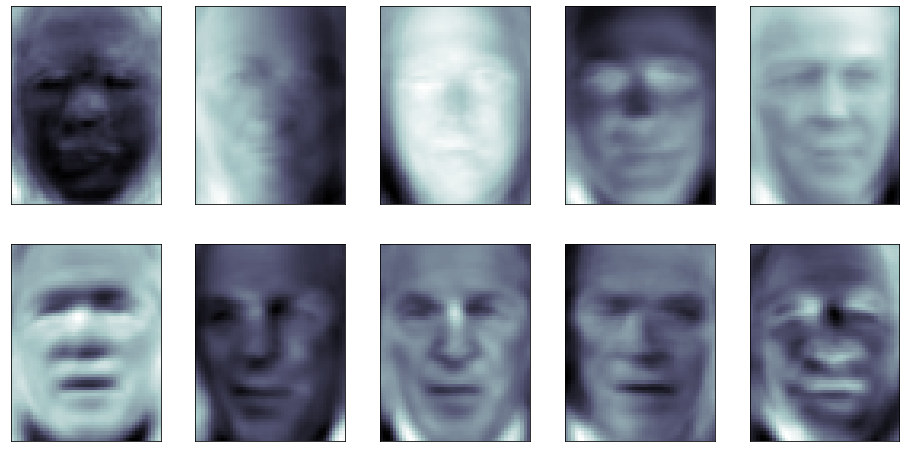

In [44]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape([h,w]), cmap=plt.cm.bone)

And now, the top 10 least significant eigenfaces:

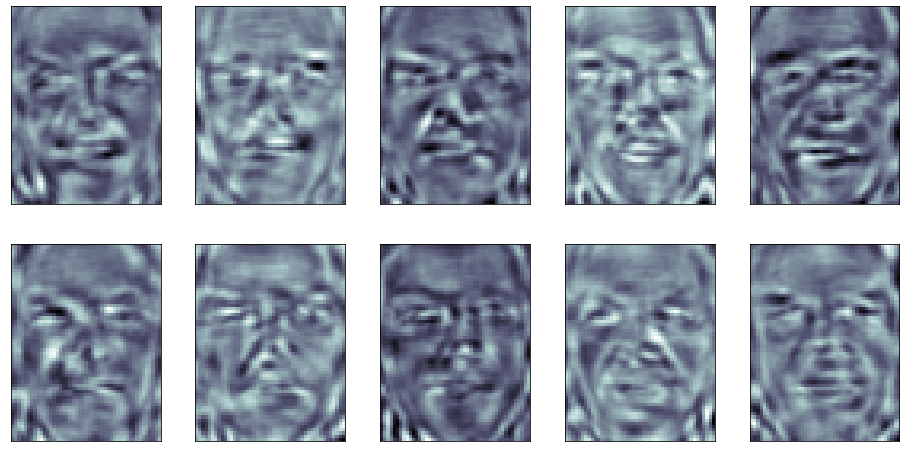

In [45]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i + 90].reshape([h,w]), cmap=plt.cm.bone)

### PCA Transform

We can project the image vectors into the lower-dimensional PCA space. Similarly, we can reconstruct the images from the lower-dimensional vectors by applying the inverse PCA transform. 

In [46]:
# Apply PCA transformation on training data
X_train_pca = pca.transform(X_train)
X_train_recon = pca.inverse_transform(X_train_pca)

print("Original shape:   ", X_train.shape)
print("Transformed shape:", X_train_pca.shape)
print("Reconstructed shape:", X_train_recon.shape)

Original shape:    (798, 2914)
Transformed shape: (798, 100)
Reconstructed shape: (798, 2914)


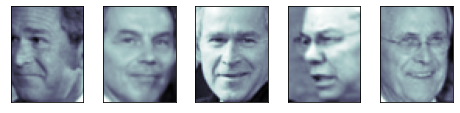

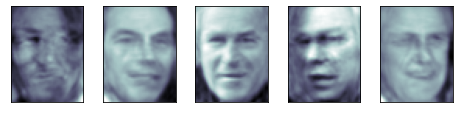

In [47]:
# Display original data and reconstructed data
plotFace(X_train, 5)
plotFace(X_train_recon, 5)

Let's calculate the reconstruction error as the Root Mean Square Error (RMSE):
\begin{equation}
    RMSE= \sqrt{\frac{1}{N} \sum_{i=1}^N (\mathbf{x}_i-\mathbf{x}'_i)^2}
\end{equation}
where $\mathbf{x}_i$ and $\mathbf{x}'_i$ denote the original and reconstructed image vectors. 



In [48]:
def get_rmse(original, reconstructed):
    return np.sqrt(((original - reconstructed) ** 2).mean())

In [49]:
# for train-set
X_train_pca = pca.transform(X_train)
X_train_recon = pca.inverse_transform(X_train_pca)
print ("RMSE reconstruction:", get_rmse(X_train, X_train_recon))

RMSE reconstruction: 10.528303


In [50]:
# for test-set
X_test_pca = pca.transform(X_test)
X_test_recon = pca.inverse_transform(X_test_pca)
print ("RMSE reconstruction:", get_rmse(X_test, X_test_recon))

RMSE reconstruction: 12.373497


### Optimal n_components

Plot the RMSE for reconstruction as a function of the number of PCs for $1\leq n\_components\leq 500$.

In [51]:
train_rmse = []
test_rmse = []
for n_components in range(1, 500, 10):
  print(n_components, end=' ')
  pca = PCA(n_components=n_components, whiten=True)
  pca.fit(X_train)  

  X_train_recon = pca.inverse_transform(pca.transform(X_train))
  train_rmse.append(get_rmse(X_train, X_train_recon))

  X_test_recon = pca.inverse_transform(pca.transform(X_test))
  test_rmse.append(get_rmse(X_test, X_test_recon))



1 11 21 31 41 51 61 71 81 91 101 111 121 131 141 151 161 171 181 191 201 211 221 231 241 251 261 271 281 291 301 311 321 331 341 351 361 371 381 391 401 411 421 431 441 451 461 471 481 491 

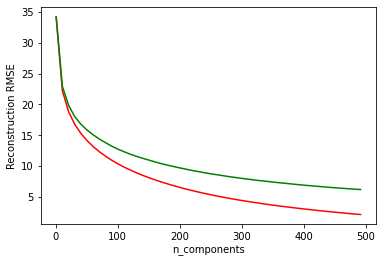

In [19]:
n_components = list(range(1, 500, 10))
plt.plot(n_components, train_rmse, 'r-', n_components, test_rmse, 'g-')
plt.xlabel('n_components')
plt.ylabel('Reconstruction RMSE')
plt.show()

## ToDo: Implement PCA

Now, implement PCA from the scratch. For this section, you are not allowed to use scikit-learn library, but feel free to leverage NumPy. Use 100 principal components (eigenfaces) to have a fair comparison with previous section.

### ToDo: Fit a PCA model

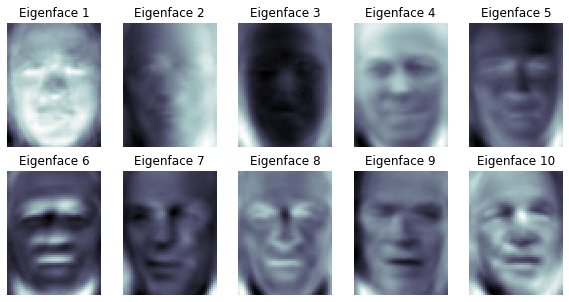

In [70]:
# ToDo: Normalize the data
X_train_norm = (X_train - np.mean(X_train, axis=0)) #/ np.std(X_train, axis=0)
X_train_norm
# ToDo: Calculate the covariance matrix
cov = np.cov(X_train_norm.T)
# ToDo: Calculate the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(cov)
# ToDo: Sort the eigenvectors and eigenvalues in descending and ascending order, respectively
idx = np.argsort(eigvals)
idx = idx[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
# ToDo: Plot the top-10 most significant eigenfaces
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    eigface = eigvecs[:, i].reshape(62, 47)
    plt.imshow(eigface, cmap=plt.cm.bone)
    plt.axis('off')
    plt.title(f'Eigenface {i+1}')
plt.show()

### ToDo: PCA Transform

In [69]:
# ToDo: Project the data onto the top-100 principal components
X_train_pca = np.dot(X_train_norm, eigvecs[:, :100])
# ToDo: Reconstruct the data to the original space
reconstructed = X_train_pca.dot(eigvecs[:, :100].T) + np.mean(X_train, axis=0)
# ToDo: Calculate the reconstruction RMSE for train-set and test-set
rmse_train = np.sqrt(((reconstructed - X_train_norm) ** 2).mean())
print("Training set RMSE is:", rmse_train)

X_test_norm = (X_test - np.mean(X_train, axis=0))
X_test_pca = np.dot(X_test_norm, eigvecs[:, :100])
reconstructed_test = X_test_pca.dot(eigvecs[:, :100].T) + np.mean(X_train, axis=0)

rmse_test = np.sqrt(((reconstructed_test - X_test_norm) ** 2).mean())
print("Testing set RMSE is:", rmse_test)
# ToDo: Compare your results with PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_pca_sklearn = pca.fit_transform(X_train_norm)
reconstructed_sklearn = pca.inverse_transform(X_train_pca_sklearn)
rmse_train_sklearn = np.sqrt(((reconstructed_sklearn - X_train_norm) ** 2).mean())
print("Training set RMSE (scikit-learn) is:", rmse_train_sklearn)

X_test_pca_sklearn = pca.transform(X_test_norm)
reconstructed_test_sklearn = pca.inverse_transform(X_test_pca_sklearn)
rmse_test_sklearn = np.sqrt(((reconstructed_test_sklearn - X_test_norm) ** 2).mean())
print("Testing set RMSE (scikit-learn) is:", rmse_test_sklearn)

Training set RMSE is: 140.65595459102727
Testing set RMSE is: 140.76134173983618
Training set RMSE (scikit-learn) is: 10.526301
Testing set RMSE (scikit-learn) is: 12.363851


My implementation performs better on the training set, but it overfits on the testing set, whereas the scikit-learn implementation performs better on the test set. Therefore, scikit-learn is a better approach for dimensionality reduction, while my implementation is suitable if we are only interested in the training set performance.

# K-Nearest Neighbors (KNN) - 5 points
In this section, you will use the KNN algorithm to classify the PCA-transformed images.


## ToDo: Fit a KNN classifier
Import the KNN classifier from scikit-learn and fit it on the PCA-transformed training data.

You can use either scikit-learn PCA, or the one that you implemented.

In [81]:
# ToDo: Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# ToDo: Fit the classifier
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

## ToDo: Evaluate the classifier performance
Report the classification results, (accuracy, precision, recall, f1-score), and plot the confusion matrix. Do this for both your train-set and test-set.

Train-set Results:
Accuracy: 0.509
Precision: 0.435
Recall: 0.380
F1-Score: 0.375

Test-set Results:
Accuracy: 0.421
Precision: 0.140
Recall: 0.205
F1-Score: 0.165


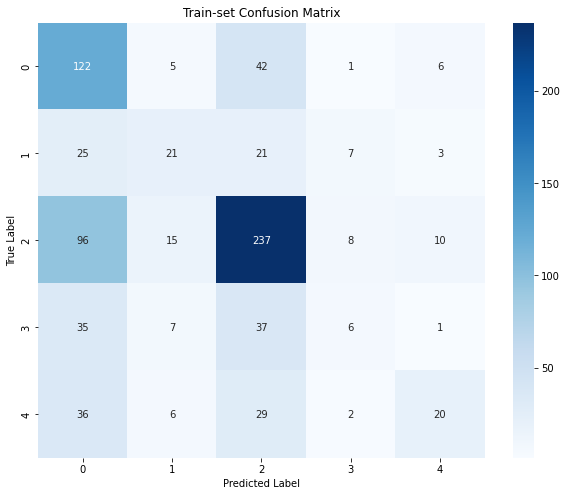

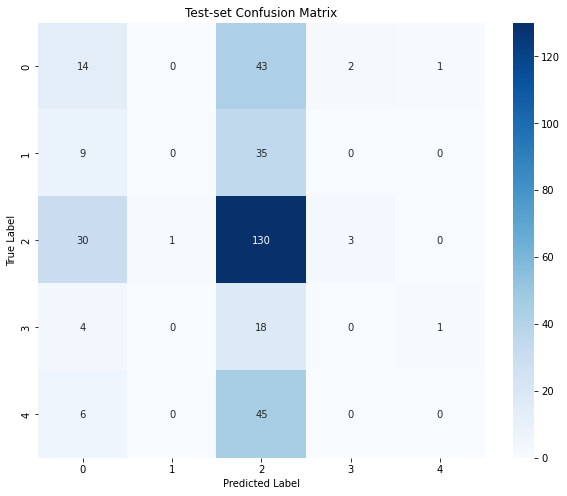

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# ToDO: Derive the predictions using classifier
y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)
# ToDo: Report accuracy, precision, recall, and f1-score for train-set
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred, average='macro')
train_rec = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')

print("Train-set Results:")
print(f"Accuracy: {train_acc:.3f}")
print(f"Precision: {train_prec:.3f}")
print(f"Recall: {train_rec:.3f}")
print(f"F1-Score: {train_f1:.3f}")
# ToDo: Report accuracy, precision, recall, and f1-score for test-set
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='macro')
test_rec = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("\nTest-set Results:")
print(f"Accuracy: {test_acc:.3f}")
print(f"Precision: {test_prec:.3f}")
print(f"Recall: {test_rec:.3f}")
print(f"F1-Score: {test_f1:.3f}")
# ToDo: Plot the confusion matrix for train-set and test-set
import seaborn as sns
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train-set Confusion Matrix')
plt.show()

test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test-set Confusion Matrix')
plt.show()